In [1]:
import pandas as pd
from garch_sarima import Sarima_Garch_Model,Data_Handler
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
df = pd.read_csv("DFs\df_5317.csv")
df

,Unnamed: 0,squareid,datetime,countryCode,smsin,smsout,callin,callout,internet
0,0,5317,2013-11-01 00:00:00,0,4.284048,NaN,1.007094,NaN,NaN
1,1,5317,2013-11-01 00:00:00,1,NaN,NaN,NaN,0.149240,NaN
2,2,5317,2013-11-01 00:00:00,39,5.771827,5.487665,6.683493,2.491539,564.824534
3,3,5317,2013-11-01 00:10:00,0,3.888559,NaN,NaN,1.074623,NaN
4,4,5317,2013-11-01 00:10:00,212,NaN,NaN,NaN,0.012337,NaN
...,...,...,...,...,...,...,...,...,...
49484,49484,5317,2014-01-01 23:40:00,49,NaN,NaN,NaN,NaN,1.789383
49485,49485,5317,2014-01-01 23:50:00,0,0.356999,1.789383,NaN,NaN,NaN
49486,49486,5317,2014-01-01 23:50:00,356,3.578766,NaN,NaN,NaN,NaN
49487,49487,5317,2014-01-01 23:50:00,39,10.003501,6.869968,0.149240,4.860140,548.267921


In [3]:
df.set_index('datetime', inplace=True)
df

,Unnamed: 0,squareid,countryCode,smsin,smsout,callin,callout,internet
datetime,,,,,,,,
2013-11-01 00:00:00,0,5317,0,4.284048,NaN,1.007094,NaN,NaN
2013-11-01 00:00:00,1,5317,1,NaN,NaN,NaN,0.149240,NaN
2013-11-01 00:00:00,2,5317,39,5.771827,5.487665,6.683493,2.491539,564.824534
2013-11-01 00:10:00,3,5317,0,3.888559,NaN,NaN,1.074623,NaN
2013-11-01 00:10:00,4,5317,212,NaN,NaN,NaN,0.012337,NaN
...,...,...,...,...,...,...,...,...
2014-01-01 23:40:00,49484,5317,49,NaN,NaN,NaN,NaN,1.789383
2014-01-01 23:50:00,49485,5317,0,0.356999,1.789383,NaN,NaN,NaN
2014-01-01 23:50:00,49486,5317,356,3.578766,NaN,NaN,NaN,NaN


In [4]:
df_agg = df.groupby(['datetime']).agg({'smsin':'sum', 'smsout':'sum', 'callin':'sum', 'callout':'sum', 'internet':'sum'})
df_agg.reset_index(inplace=True)
df_agg.set_index('datetime', inplace=True)
df_agg

,smsin,smsout,callin,callout,internet
datetime,,,,,
2013-11-01 00:00:00,10.055875,5.487665,7.690587,2.640779,564.824534
2013-11-01 00:10:00,24.766975,15.647644,5.573892,11.251499,440.036639
2013-11-01 00:20:00,6.082408,16.869948,13.448152,2.278560,409.364519
2013-11-01 00:30:00,13.633629,8.654530,0.004680,1.686311,410.041228
2013-11-01 00:40:00,13.595536,6.704609,1.166935,3.367247,353.102908
...,...,...,...,...,...
2014-01-01 23:10:00,39.825862,22.224249,6.644067,5.670237,397.606109
2014-01-01 23:20:00,37.088606,20.260126,2.213681,9.620154,1042.002857
2014-01-01 23:30:00,15.816374,17.036917,0.808748,0.382809,242.091384


In [5]:
data = Data_Handler(df['internet'])

In [6]:
data.stationarity_test()

ADF Statistic: -16.278966396250976
p-value: 3.427540463218334e-29


'Stationary'

In [7]:
data_agg_sum = data.Data_aggregation(aggregation='sum')
data_agg_mean = data.Data_aggregation(aggregation='mean')


In [8]:
data_agg_sum

datetime
2013-11-01 00:00:00    2452.753511
2013-11-01 01:00:00    1774.119403
2013-11-01 02:00:00    1348.385361
2013-11-01 03:00:00    1401.388032
2013-11-01 04:00:00    1310.907478
                          ...     
2014-01-01 19:00:00    3362.227305
2014-01-01 20:00:00    3071.475128
2014-01-01 21:00:00    5946.454134
2014-01-01 22:00:00    3421.147711
2014-01-01 23:00:00    4259.785378
Freq: h, Name: internet, Length: 1488, dtype: float64

In [9]:
scaler = StandardScaler()
data_agg_sum_scaled = scaler.fit_transform(data_agg_sum.values.reshape(-1, 1))
data_agg_sum_scaled = pd.Series(data_agg_sum_scaled.flatten(), index=data_agg_sum.index)
data_agg_sum_scaled

datetime
2013-11-01 00:00:00   -0.819848
2013-11-01 01:00:00   -1.255731
2013-11-01 02:00:00   -1.529178
2013-11-01 03:00:00   -1.495134
2013-11-01 04:00:00   -1.553250
                         ...   
2014-01-01 19:00:00   -0.235697
2014-01-01 20:00:00   -0.422446
2014-01-01 21:00:00    1.424139
2014-01-01 22:00:00   -0.197853
2014-01-01 23:00:00    0.340800
Freq: h, Length: 1488, dtype: float64

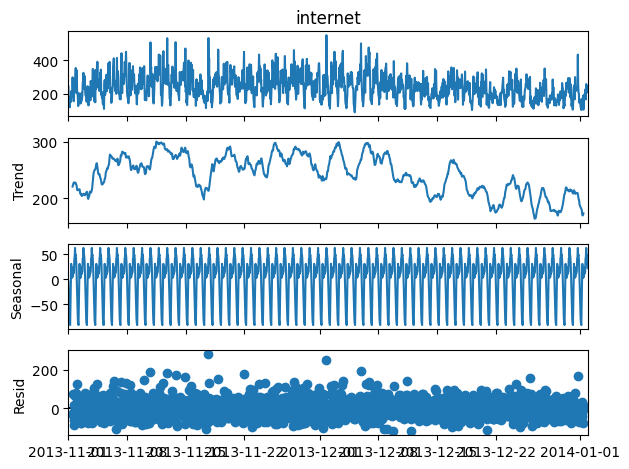

In [10]:
data.Data_Seasonal_Decomposer('additive')

In [11]:
data.plot_data()

In [12]:
data_sum_smoothed = data.Data_smoothing(smoothing=True, smoothing_window=10)
data_mean_smoothed = data.Data_smoothing(smoothing=True, smoothing_window=10)

In [13]:
forecaster_sum = Sarima_Garch_Model(data_agg_sum)
forecaster_mean = Sarima_Garch_Model(data_agg_mean)
forecaster_sum_smoothed = Sarima_Garch_Model(data_sum_smoothed)
forecaster_mean_smoothed = Sarima_Garch_Model(data_mean_smoothed)

In [14]:
forecaster_sum_fit = forecaster_sum.fit_predict_rolling(
    arima_order=(2, 1, 2),
    seasonal_order=(1, 1, 1, 24),
    garch_p=2,
    garch_q=3,
    training_window=5*24,
    sarima_pred_steps=24,
    rolling_step_sarima=24,
    garch_pred_steps=1,
    rolling_step_garch=1
)


c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

c:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum L

SARIMA Rolling Prediction is completed successfully
GARCH Rolling Prediction is completed successfully
Combined Rolling Prediction is completed successfully


In [15]:
Mape_forecaster_sum_combined = forecaster_sum.evaluation(rolling=True, model_to_evaluate='combined', eval_metric='mape')
Mape_forecaster_sum_sarima = forecaster_sum.evaluation(rolling=True, model_to_evaluate='sarima', eval_metric='mape')

In [16]:
forecaster_sum.plot_predictions(model_to_plot='sarima')

In [17]:
forecaster_sum.plot_predictions(model_to_plot='combined')

In [18]:
print("Mean Absolute Percentage Error for combined model:", Mape_forecaster_sum_combined)
print("Mean Absolute Percentage Error for SARIMA model:", Mape_forecaster_sum_sarima)

Mean Absolute Percentage Error for combined model: 0.2763848876433658
Mean Absolute Percentage Error for SARIMA model: 0.20831639499194654


In [19]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

MAPE(data_agg_sum_scaled[144:], forecaster_sum.predicted_values)

ValueError: Found input variables with inconsistent numbers of samples: [1344, 1368]

In [ ]:
MAPE(data_agg_sum_scaled[144:], forecaster_sum.sarima_rolling_predictions)

2.7178896769113177

In [ ]:
predicted_values = scaler.inverse_transform(forecaster_sum.predicted_values.values.reshape(-1, 1))

In [ ]:
MAPE(data_agg_sum[144:], predicted_values)

0.3839655761696365